Проверяем гипотезу

Поля, на которых проводилось больше работ по обработке и уходу, показывают более высокую урожайность.

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kstest
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import norm 

In [42]:
dfw = pd.read_csv('works.csv', encoding='1251', sep=';', decimal=',')
dfw.head()

,season,field,work_type,work_subtype,start_date,end_date,area,main_tech,add_tech,mech,proc_depth,prod_purpose,prod_weight,prod_dry_perc,prod_humid,prod_impur,yield_fact,work_id
0,2023,16.13.12.044.00,Обработка почвы,Боронование,29.04.2022,30.04.2022,"49,78","Трактор колесный Fendt 936 Vario, гос.ном. 050...",Арендованная техника,Ахметсафин Айрат Рафикович,10.0,NaN,0.0,NaN,NaN,NaN,0.0,A06AD38A-5448-40EC-B095-4B8918B4AC10
1,2023,16.13.12.017.00,Обработка почвы,Боронование,01.05.2022,02.05.2022,"154,76","Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...","Борона зубовая Veles АГС-22-2У.М, зав.ном. 789",Ямалетдинов Фарид Расыхович,10.0,NaN,0.0,NaN,NaN,NaN,0.0,62B13DCE-FFB5-4E7A-8F1B-88930BD338EF
2,2023,16.13.12.012.00,Обработка почвы,Боронование,02.05.2022,03.05.2022,"40,62","Трактор колесный Fendt 936 Vario, гос.ном. 050...",Арендованная техника,Мухаметзянов Ринат Айратович,10.0,NaN,0.0,NaN,NaN,NaN,0.0,D5884A6D-4710-4C0A-8E5A-878291B89846
3,2023,16.13.12.012.00,Обработка почвы,Боронование,02.05.2022,03.05.2022,"86,00","Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...","Борона зубовая Veles АГС-22-2У.М, зав.ном. 789",Шакиров Ринат Галиевич,10.0,NaN,0.0,NaN,NaN,NaN,0.0,7A504837-1127-4315-ACF1-171AC80111BF
4,2023,16.13.12.017.00,Обработка почвы,Боронование,02.05.2022,03.05.2022,"76,00","Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...","Борона зубовая Veles АГС-22-2У.М, зав.ном. 789",Шакиров Ринат Галиевич,10.0,NaN,0.0,NaN,NaN,NaN,0.0,7FE86DA8-614B-4EBE-85CB-6AF80C08689F


In [43]:
dfw.isna().sum()

season                0
field                 0
work_type             0
work_subtype          0
start_date            0
end_date           9004
area                  0
main_tech             0
add_tech          48540
mech                  0
proc_depth       132562
prod_purpose     140822
prod_weight           0
prod_dry_perc    161715
prod_humid       151128
prod_impur       151128
yield_fact            0
work_id               0
dtype: int64

In [44]:
count_works = dfw['field'].value_counts()
dfw['count_works'] = dfw['field'].apply(lambda x:count_works[x])
dfw.head()

,season,field,work_type,work_subtype,start_date,end_date,area,main_tech,add_tech,mech,proc_depth,prod_purpose,prod_weight,prod_dry_perc,prod_humid,prod_impur,yield_fact,work_id,count_works
0,2023,16.13.12.044.00,Обработка почвы,Боронование,29.04.2022,30.04.2022,"49,78","Трактор колесный Fendt 936 Vario, гос.ном. 050...",Арендованная техника,Ахметсафин Айрат Рафикович,10.0,NaN,0.0,NaN,NaN,NaN,0.0,A06AD38A-5448-40EC-B095-4B8918B4AC10,35
1,2023,16.13.12.017.00,Обработка почвы,Боронование,01.05.2022,02.05.2022,"154,76","Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...","Борона зубовая Veles АГС-22-2У.М, зав.ном. 789",Ямалетдинов Фарид Расыхович,10.0,NaN,0.0,NaN,NaN,NaN,0.0,62B13DCE-FFB5-4E7A-8F1B-88930BD338EF,53
2,2023,16.13.12.012.00,Обработка почвы,Боронование,02.05.2022,03.05.2022,"40,62","Трактор колесный Fendt 936 Vario, гос.ном. 050...",Арендованная техника,Мухаметзянов Ринат Айратович,10.0,NaN,0.0,NaN,NaN,NaN,0.0,D5884A6D-4710-4C0A-8E5A-878291B89846,19
3,2023,16.13.12.012.00,Обработка почвы,Боронование,02.05.2022,03.05.2022,"86,00","Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...","Борона зубовая Veles АГС-22-2У.М, зав.ном. 789",Шакиров Ринат Галиевич,10.0,NaN,0.0,NaN,NaN,NaN,0.0,7A504837-1127-4315-ACF1-171AC80111BF,19
4,2023,16.13.12.017.00,Обработка почвы,Боронование,02.05.2022,03.05.2022,"76,00","Трактор колесный Птз К-744Р4, гос.ном. 2251АА1...","Борона зубовая Veles АГС-22-2У.М, зав.ном. 789",Шакиров Ринат Галиевич,10.0,NaN,0.0,NaN,NaN,NaN,0.0,7FE86DA8-614B-4EBE-85CB-6AF80C08689F,53


In [45]:
kstest(dfw['count_works'], "norm"), kstest(dfw['yield_fact'], "norm")

(KstestResult(statistic=0.995547338677151, pvalue=0.0),
 KstestResult(statistic=0.5, pvalue=0.0))

Распределение нормальное, значит, корреляицю ищем по Пирсону

<AxesSubplot: xlabel='count_works', ylabel='yield_fact'>

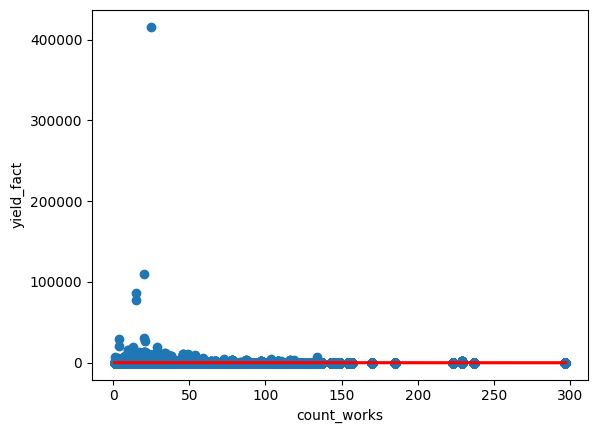

In [46]:
plt.scatter(x=dfw['count_works'], y=dfw['yield_fact'])
sns.regplot(x=dfw['count_works'], y=dfw['yield_fact'], scatter=False, color='red', label='Линия регрессии')

Определенно выдно существование супервыбросово y, удалим их

In [47]:
'''
iqr = 3 * (dfw['yield_fact'].quantile(0.75) - dfw['yield_fact'].quantile(0.25))
meann = dfw['yield_fact'].mean()
''' # интеркваль не работает, тк он равен 0
dfw = dfw[dfw['yield_fact'] <= dfw['yield_fact'].quantile(0.99)]

In [48]:
dfw['yield_fact']

0         0.00
1         0.00
2         0.00
3         0.00
4         0.00
          ... 
174678    0.00
174679    1.15
174680    0.00
174681    0.00
174682    3.18
Name: yield_fact, Length: 172936, dtype: float64

<AxesSubplot: xlabel='count_works', ylabel='yield_fact'>

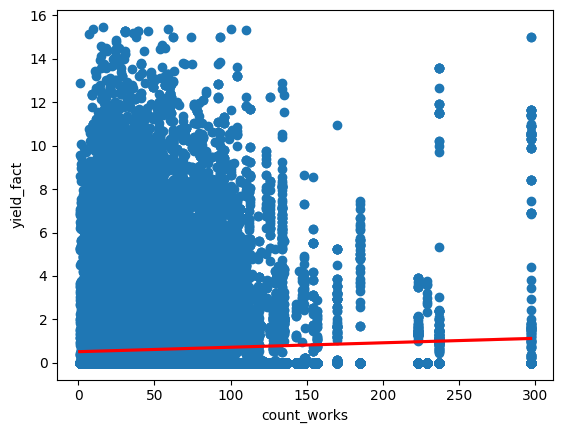

In [49]:
plt.scatter(x=dfw['count_works'], y=dfw['yield_fact'])
sns.regplot(x=dfw['count_works'], y=dfw['yield_fact'], scatter=False, color='red', label='Линия регрессии')

In [52]:
dfw.corr(numeric_only=1)['count_works']['yield_fact']

0.04049623501114062

Категоризируем по 50 (почему нет) работ на поле:

In [74]:
dfw_1 = dfw[dfw['count_works'] <= 25] # на 50 получалось СЛИШКОМ много
dfw_2 = dfw[(dfw['count_works'] <= 50) & (dfw['count_works'] > 25)]
dfw_3 = dfw[(dfw['count_works'] <= 100) & (dfw['count_works'] > 50)]
dfw_4 = dfw[(dfw['count_works'] <= 150) & (dfw['count_works'] > 100)]
dfw_5 = dfw[(dfw['count_works'] <= 200) & (dfw['count_works'] > 150)]
dfw_6 = dfw[(dfw['count_works'] <= 250) & (dfw['count_works'] > 200)]
dfw_7 = dfw[(dfw['count_works'] <= 300) & (dfw['count_works'] > 250)]

In [64]:
from scipy import stats

Нулевая гипотеза: все значения одинаковые

In [75]:
def check_hypothesis_anova(*args, alpha=0.05):
    f_stat, p_value = stats.f_oneway(*args)
    
    # Проверка нулевой гипотезы
    if p_value < alpha:
        conclusion = "Отвергаем нулевую гипотезу: Средние значения групп различаются."
    else:
        conclusion = "Не удается отвергнуть нулевую гипотезу: Средние значения групп не различаются."
    
    return f_stat, p_value, conclusion
f_stat, p_value, conclusion = check_hypothesis_anova(dfw_1['yield_fact'], dfw_2['yield_fact'], dfw_3['yield_fact'], dfw_4['yield_fact'],
                                                     dfw_5['yield_fact'], dfw_6['yield_fact'], dfw_7['yield_fact'])
print(f"F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")
print(conclusion)

F-statistic: 67.8008, p-value: 0.0000
Отвергаем нулевую гипотезу: Средние значения групп различаются.


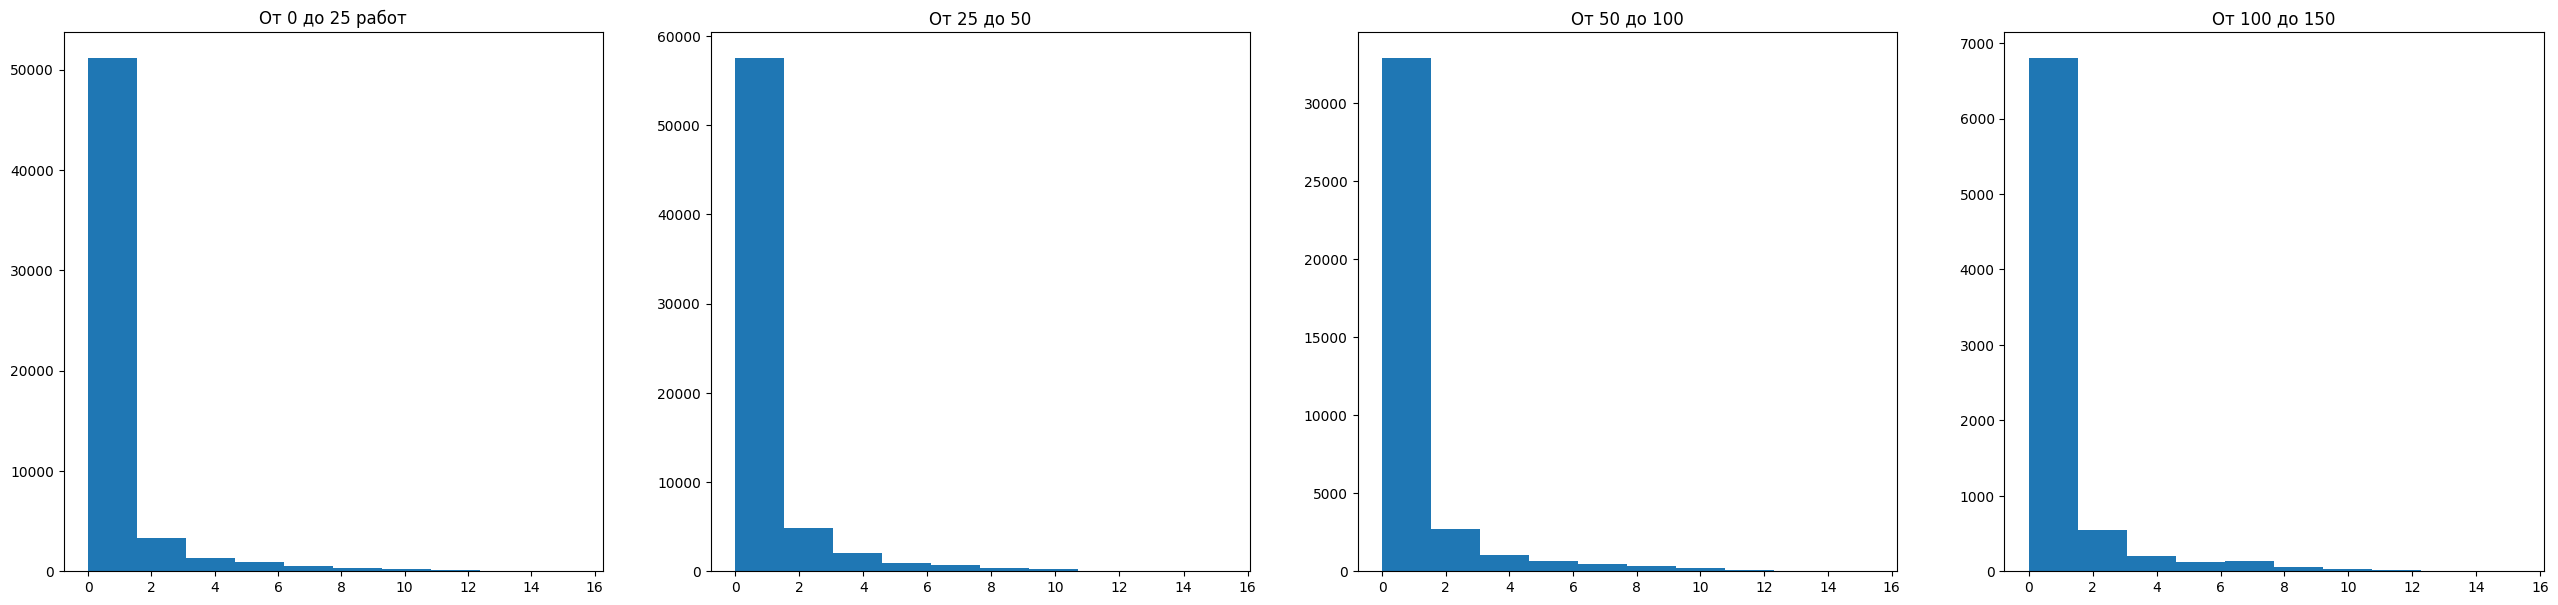

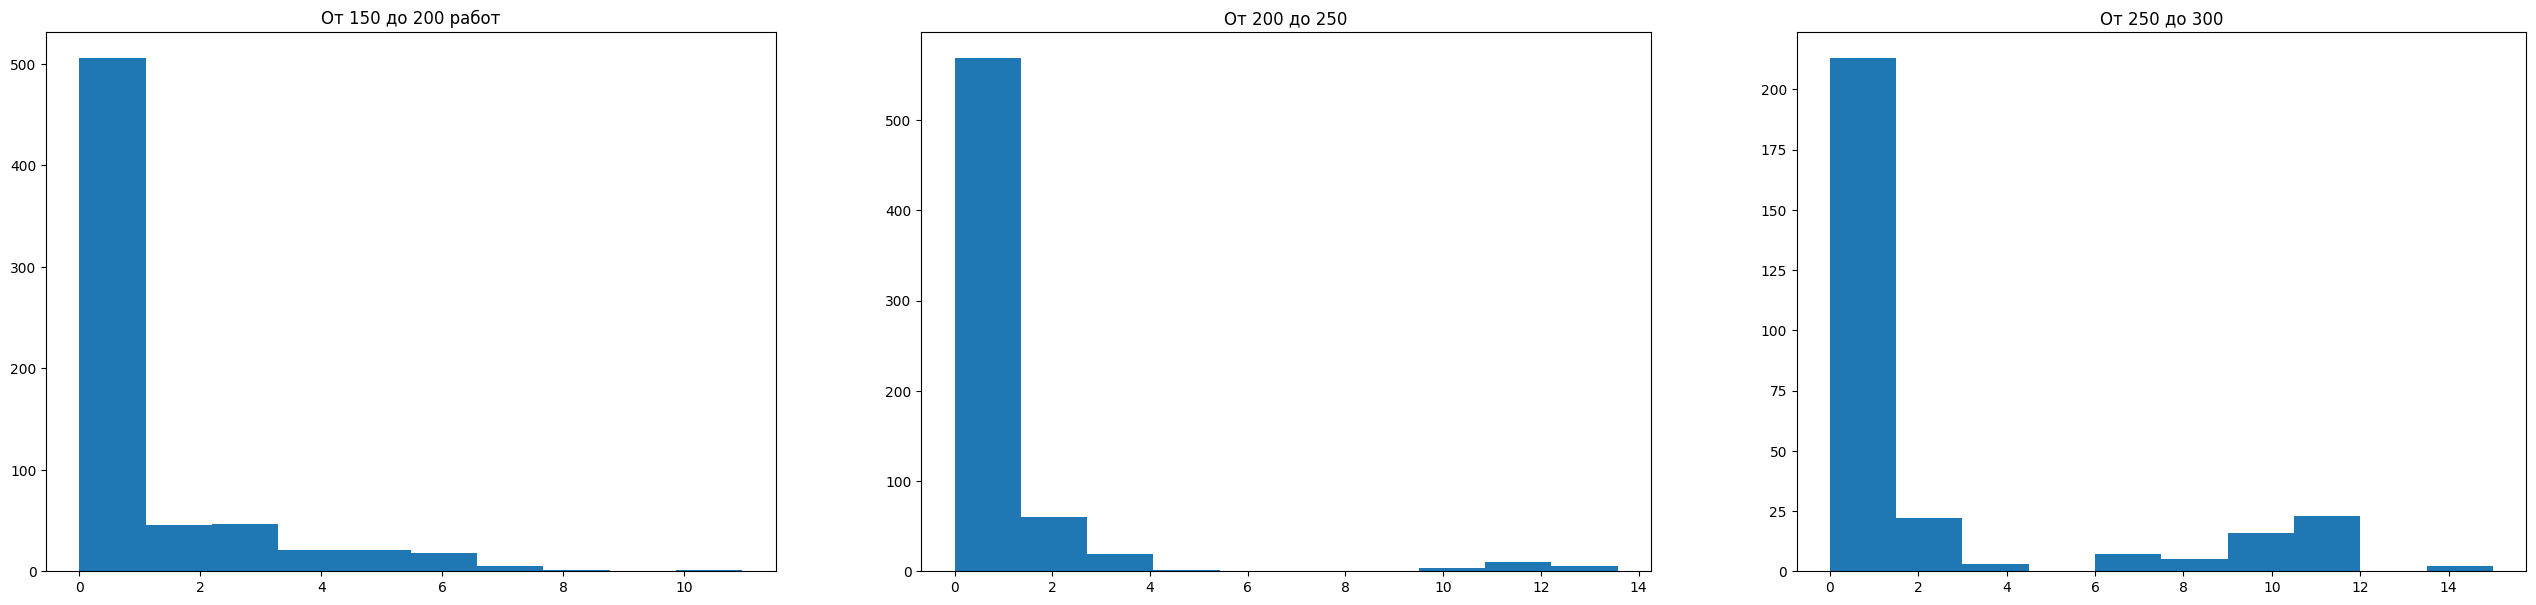

In [95]:
f, ax = plt.subplots(1, 4, figsize=(32, 7))
ax[0].hist(dfw_1['yield_fact'])
ax[0].set_title('От 0 до 25 работ')
ax[1].hist(dfw_2['yield_fact'])
ax[1].set_title('От 25 до 50')
ax[2].hist(dfw_3['yield_fact'])
ax[2].set_title('От 50 до 100')
ax[3].hist(dfw_4['yield_fact'])
ax[3].set_title('От 100 до 150')
plt.show()
f, ax = plt.subplots(1, 3, figsize=(32, 7))
ax[0].hist(dfw_5['yield_fact'])
ax[0].set_title('От 150 до 200 работ')
ax[1].hist(dfw_6['yield_fact'])
ax[1].set_title('От 200 до 250')
ax[2].hist(dfw_7['yield_fact'])
ax[2].set_title('От 250 до 300')
plt.show()

Распределение похожее

In [101]:
print("Средние значения")
print(f'От 0 до 25 работ: {dfw_1["yield_fact"].mean()}')
print(f'От 25 до 50: {dfw_2["yield_fact"].mean()}')
print(f'От 50 до 100: {dfw_3["yield_fact"].mean()}')
print(f'От 100 до 150: {dfw_4["yield_fact"].mean()}')
print(f'От 150 до 200 работ: {dfw_5["yield_fact"].mean()}')
print(f'От 200 до 250: {dfw_6["yield_fact"].mean()}')
print(f'От 250 до 300: {dfw_7["yield_fact"].mean()}')

Средние значения
От 0 до 25 работ: 0.5423087257570017
От 25 до 50: 0.5954829838432452
От 50 до 100: 0.664983605704174
От 100 до 150: 0.622917771883289
От 150 до 200 работ: 0.8468018018018019
От 200 до 250: 0.7218684603886398
От 250 до 300: 2.116254295532646
